## Loading the library

In [21]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


### Load the dataset. It consists of 148 features

In [22]:
df = pd.read_csv('dataset.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,OCD,depression,anxiety,aggressive,fear_of_contamination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4932,OCD,extreme_need_for_order,stress,excessive cleaning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4933,ADHD,lack_of_concentration,restlessness,impulsiveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4934,ADHD,depression,mood_swings,hyperactivity,inattentiveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df = df.fillna(0, axis="columns")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### we divide a dataset in to 2 parts:  'Training.csv' , 'Testing.csv'

In [24]:
training = pd.read_csv('Training.csv')
testing= pd.read_csv('Testing.csv')

#Saving the information of columns
cols= training.columns
cols= cols[:-1]

#Slicing and Dicing the dataset to separate features from predictions
x = training[cols]
y = training['prognosis']
y1= y

#Dimentionality Reduction for removing redundancies
reduced_data = training.groupby(training['prognosis']).max()

#Encoding String values to integer constants
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[ 1  1  1 ... 42 39 30]


#### Splitting the dataset into training set and testing set 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
testx    = testing[cols]
testy    = testing['prognosis']  
testy    = le.transform(testy)

#### Implementing the Decision Tree Classifier 

In [26]:
model  = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
clf = model.fit(x_train,y_train)

In [28]:
#Model Evaluation Using Cross Validation Method
scores = cross_val_score(clf, x_test, y_test, cv=3)
print (scores.mean())

0.9759259259259259


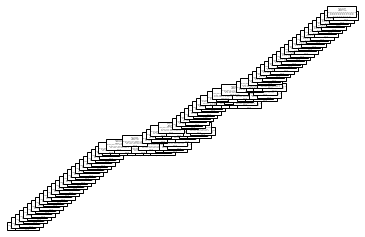

In [29]:
#Visualization of a decision tree
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf)
plt.show()
#plt.savefig('HC-Chatbot.png')

In [30]:
#used to save the model
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(clf,file)

In [31]:
#Checking the Important Features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols
print(features)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'loss_of_interest', 'sucidal_thoughts', 'delayed_responses', 'insomnia',
       'stress', 'fear_of_contamination', 'forgetfulness', 'quick temper',
       'edginess', 'carelessness'],
      dtype='object', length=148)


##### Method of simulate the working of the Chatbot by extracting and formulating Questions 

In [32]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()


In [33]:
symptoms_dict = {}

for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


In [34]:
def getDescription():
    global description_list
    with open('symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)



In [35]:
def getSeverityDict():
    global severityDictionary
    with open('Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass

In [36]:
def getprecautionDict():
    global precautionDictionary
    with open('symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)


In [37]:
def getInfo():
    # name=input("Name:")
    print("Your Name \n\t\t\t\t\t\t",end="->")
    name=input("").lower()
    print("hello ",name)

In [38]:
def check_pattern(dis_list,inp):
    import re
    pred_list=[]
    ptr=0
    patt = "^" + inp + "$"
    regexp = re.compile(inp)
    for item in dis_list:
        if regexp.search(item):
            pred_list.append(item)
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return ptr,item

In [39]:
def sec_predict(symptoms_exp):
    df = pd.read_csv('Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {}

    for index, symptom in enumerate(X):
        symptoms_dict[symptom] = index

    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])

In [40]:
def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return disease
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []

    
    while True:

        print("Enter the symptom you are experiencing  \n\t\t\t\t\t\t",end="->")
        disease_input = input("").lower()
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter number of days.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])

                print(description_list[present_disease[0]])


            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            #print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)
                

    recurse(0, 1)
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)


Your Name 
						->mann
hello  mann
Enter the symptom you are experiencing  
						->delayed_response
searches related to input: 
0 ) delayed_responses
Okay. From how many days ? : 5
Are you experiencing any 
fatigue ? : yes
weight_loss ? : no
restlessness ? : yes
loss_of_appetite ? : no
obesity ? : yes
irritability ? : yes
lack_of_concentration ? : yes
drinking_excessively ? : no
anxiousness ? : yes
aggressive ? : no
sad ? : no
hopeless ? : yes
loss_of_interest ? : yes
sucidal_thoughts ? : no
delayed_responses ? : no
insomnia ? : yes
You should take the consultation from doctor. 
You may have  Depression or  Anxiety Disorder
Depression (major depressive disorder) is a common and serious medical illness that negatively affects how you feel, the way you think and how you act. Fortunately, it is also treatable. Depression causes feelings of sadness and/or a loss of interest in activities you once enjoyed. It can lead to a variety of emotional and physical problems and can decrease your a